# Logistic Regression
Investigating associations between: 
- age standardised disease mortality rates and overall healthcare spending per capita 
- grouped by disease, country, country income, sex

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_excel("3. Merged global age standardized mortality & health spending.xlsx")

In [3]:
df.isnull().sum()

location_id                0
country                    0
cause_id                   0
cause_name                 0
female_mortality_rate      0
male_mortality_rate        0
both_mortality_rate        0
code                       0
region                     0
income                     0
year                       0
che_gdp                   42
che_pc_usd                42
che                       42
gghed_pc_usd              42
pvtd_pc_usd               42
oop_pc_usd                42
ext_pc_usd               462
gdp_pc_usd                42
gdp                       42
gge                       42
ppp                       42
xrt                        0
gdpd                       0
pop                       42
che_usd                   42
gghed_usd                 42
pvtd_usd                  42
ext_usd                  462
dtype: int64

In [4]:
df.drop(columns={'location_id', 'year', 'ext_pc_usd', 'ext_usd'}, inplace=True)

In [5]:
df.dropna(inplace=True)

In [6]:
df.isna().sum()

country                  0
cause_id                 0
cause_name               0
female_mortality_rate    0
male_mortality_rate      0
both_mortality_rate      0
code                     0
region                   0
income                   0
che_gdp                  0
che_pc_usd               0
che                      0
gghed_pc_usd             0
pvtd_pc_usd              0
oop_pc_usd               0
gdp_pc_usd               0
gdp                      0
gge                      0
ppp                      0
xrt                      0
gdpd                     0
pop                      0
che_usd                  0
gghed_usd                0
pvtd_usd                 0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3969 entries, 0 to 4010
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                3969 non-null   object 
 1   cause_id               3969 non-null   int64  
 2   cause_name             3969 non-null   object 
 3   female_mortality_rate  3969 non-null   float64
 4   male_mortality_rate    3969 non-null   float64
 5   both_mortality_rate    3969 non-null   float64
 6   code                   3969 non-null   object 
 7   region                 3969 non-null   object 
 8   income                 3969 non-null   object 
 9   che_gdp                3969 non-null   float64
 10  che_pc_usd             3969 non-null   float64
 11  che                    3969 non-null   float64
 12  gghed_pc_usd           3969 non-null   float64
 13  pvtd_pc_usd            3969 non-null   float64
 14  oop_pc_usd             3969 non-null   float64
 15  gdp_pc_us

### Column codes
- country:	Country name
- code:	Country code (ISO-3)
- region:	Region (WHO)
- income:	Country income group 2021 (World Bank)
- che_gdp:	Current Health Expenditure(CHE) as % Gross Domestic Product(GDP), CHE%GDP_SHA2011,	INDICATORS	AGGREGATES	Percentage
- che_pc_usd:	Current Health Expenditure (CHE) per Capita in USD,	CHE_pc_USD_SHA2011,	Indicators aggregates,	Ones, USD
- gghed_pc_usd:	Domestic General Government Health Expenditure(GGHE-D) per Capita in USD, GGHE-D_pc_USD_SHA2011,	Indicators Financing Sources,	Ones,	USD
- pvtd_pc_usd:	Domestic Private Health Expenditure(PVT-D) per Capita in USD,	PVT-D_pc_USD_SHA2011, Indicators Financing Sources,	Ones,	USD
- oop_pc_usd:	Out-of-Pocket Expenditure(OOPS) per Capita in USD,	OOP_pc_USD_SHA2011, Indicators Financing Sources,	Ones,	USD
- ext_pc_usd:	External Health Expenditure(EXT) per Capita in USD,	EXT_pc_USD_SHA2011, Indicators Financing Sources,	Ones,	USD
- gdp:	Gross Domestic Product(GDP), in million current NCU,	GDP-WHS,	MACRO DATA,	CONSUMPTION,	Millions,	NCU
- pop:	Population(in thousands), Pop-WHS,	MACRO DATA,	POPULATION,	Thousands


In [ ]:
# This code won't run!
#List of columns to include in the correlation analysis
#included_columns = ['mortality_rate', 'che_pc_usd']  # Add your desired column names here

# Calculate correlation matrix for the included columns
#correlation_matrix = df[included_columns].corr()

# Assuming 'group_column' is the column with string values for grouping
# and 'included_columns' is a list of columns to include in the correlation analysis
#grouped = df.groupby(['country', 'age_name', 'cause_name'])

#plt.figure(figsize=(15, 10))

# Loop through each group and plot correlation heatmap
#for group_name, group_data in grouped:
#    correlation_matrix = group_data[included_columns].corr()  # Include only particular columns
#    plt.subplot(len(grouped), 1, list(grouped.groups.keys()).index(group_name) + 1)
#    plt.title(f'Correlation Heatmap for Group: {group_name}')
#    sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, fmt=".2f")

#plt.tight_layout()
#plt.show()

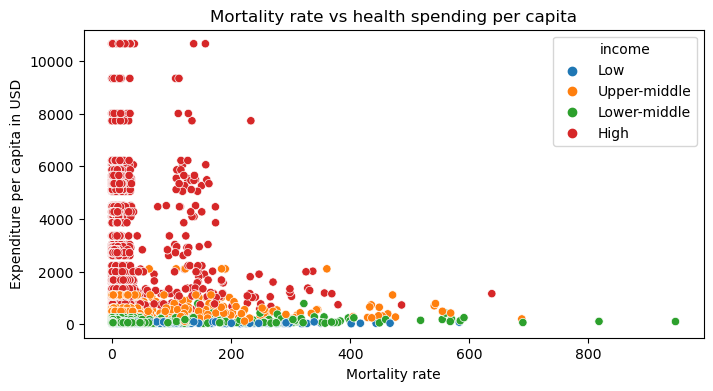

In [9]:
plt.figure(figsize=(8, 4))
plt.title('Mortality rate vs health spending per capita')  # Add title

# Assuming df is your DataFrame containing the necessary data
sns.scatterplot(data=df, x='both_mortality_rate', y='che_pc_usd', hue = 'income')  
plt.xlabel('Mortality rate')
plt.ylabel('Expenditure per capita in USD')

plt.show()

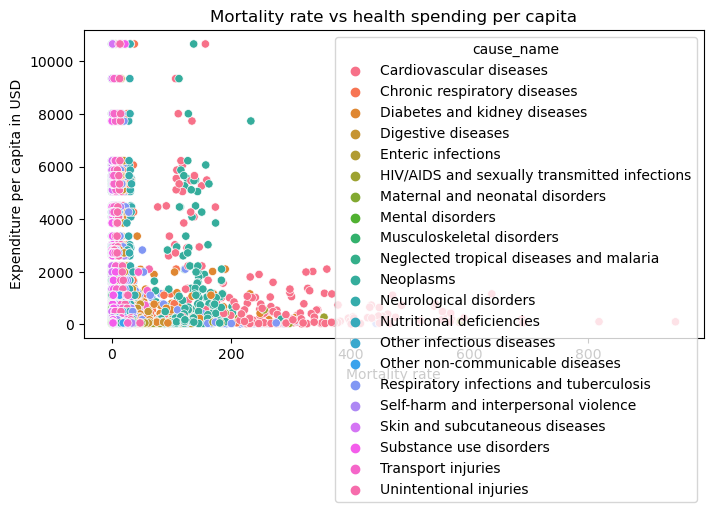

In [10]:
plt.figure(figsize=(8, 4))
plt.title('Mortality rate vs health spending per capita')  # Add title

# Assuming df is your DataFrame containing the necessary data
sns.scatterplot(data=df, x='both_mortality_rate', y='che_pc_usd', hue='cause_name')  
plt.xlabel('Mortality rate')
plt.ylabel('Expenditure per capita in USD')

plt.show()

In [11]:
# Check for non-numeric values in the 'EMR' column
#non_numeric_values = df['code'].loc[~df['code'].astype(str).str.isnumeric()]

# Print non-numeric values
#print("Non-numeric values in the 'code' column:")
#print(non_numeric_values)


In [13]:
# Create a boxplot error!!
#grouped = df.groupby(['country', 'cause_name', 'age_name', 'sex_name']).mean().reset_index()  
#plt.figure(figsize=(8, 4)) 
#plt.title('Boxplots')
#sns.boxplot(df=grouped, orient = 'h')
#plt.show();

In [12]:
# this logreg models all data - will be better to consider specific age groups and sex...

# Declare your feature (independent) variable(s). Using mortality_rate and che_pc_usd
feature_vars = ['both_mortality_rate', 'che_pc_usd']
X = df[feature_vars] 

# Declare your target (dependent) variable(s). We want to predict cause_name, so that will be our target series
y = df['cause_name']

In [13]:
# Split the data into training and testing sets (e.g., 80% train, 20% test)
# We use the train_test_split function from the sklearn.model_selection library

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
logreg = LogisticRegression() 

logreg.fit(X_train, y_train)
#logreg

C:\Users\oakpogheneta\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
logreg.intercept_

array([-3.37427630e-03, -2.97435748e-04, -7.20366750e-04, -1.92375205e-04,
        2.98968302e-04,  1.70805078e-04,  3.60993873e-04,  7.61876553e-04,
        7.65131456e-04,  3.87528934e-04, -1.67914657e-03,  5.76205026e-05,
        4.65666254e-04,  6.38703032e-04,  5.18418106e-04, -6.67583237e-04,
        5.16041043e-04,  7.20764240e-04,  6.55139281e-04,  3.23040112e-04,
        2.90487037e-04])

In [16]:
# Check your coefficient for this model
logreg.coef_
# outputs relate to the 21 disease groups....

array([[ 3.05627700e-02, -2.98656008e-04],
       [ 1.58199673e-02, -4.47650848e-05],
       [ 2.27199799e-02, -7.17610308e-05],
       [ 1.62418301e-02, -3.42306315e-05],
       [ 8.30273668e-03,  4.40704028e-05],
       [ 1.86793057e-02, -8.98958716e-05],
       [ 5.64858469e-03,  3.68702879e-05],
       [-3.99049312e-02,  8.73917761e-05],
       [-3.75506147e-02,  1.15663752e-04],
       [-5.61832022e-03,  6.43933815e-05],
       [ 2.70656619e-02, -1.61358156e-04],
       [ 1.83483863e-02, -5.15144651e-05],
       [-2.90190116e-02,  1.11690722e-04],
       [-1.72916344e-02,  8.08739061e-05],
       [-1.59214520e-03,  5.34774427e-05],
       [ 2.49097560e-02, -1.26592165e-04],
       [ 3.42023558e-03,  6.16793487e-07],
       [-3.54820464e-02,  1.28601082e-04],
       [-3.06363135e-02,  6.85266338e-05],
       [-3.71541251e-03,  7.90270586e-05],
       [ 9.09121559e-03,  7.57017293e-06]])

In [17]:
# Probabilities for a disease cause with zero mortality rate
pred1 = pd.DataFrame({'both_mortality_rate' : 0, 'che_pc_usd': 0}, index=[100000000])

#index = [0] creates a new dictionary object in the dataframe - 
# with value 0 for disease specific mortality rate. Illustration example
# index here is a technicality for the function

logreg.predict_proba(pred1)
# probability for a disease mortality rate will be associated with country spending on healthcare  
# above average association with specific disease
# upper and lower probabilities?

array([[0.04745862, 0.04760486, 0.04758474, 0.04760987, 0.04763326,
        0.04762716, 0.04763622, 0.04765532, 0.04765547, 0.04763748,
        0.04753913, 0.04762177, 0.04764121, 0.04764945, 0.04764372,
        0.04758725, 0.04764361, 0.04765336, 0.04765023, 0.04763441,
        0.04763286]])

In [18]:
print('training accuracy: ' + str(logreg.score(X_train,y_train)))
print('testing accuracy: ' + str(logreg.score(X_test,y_test)))
print('baseline accuracy: ' + str(df['AboveAverage'].value_counts(normalize = True).max()))
## define 'AboveAverage'...

training accuracy: 0.07401574803149606
testing accuracy: 0.07052896725440806


KeyError: 'AboveAverage'

In [ ]:
#Confusion matrix with 4 categories. True positive, False positive, True negative, False negative

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()
plt.show()

## define y_true